In [2]:
%pip install pandas
%pip install numpy
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fetch the normal Dataset;
normal_flow_files = os.listdir('features/Normal')

In [3]:
print(normal_flow_files[0:4])

['_00111_20180315125941_0.csv', '_00111_20180315125941_1.csv', '_00111_20180315125941_10.csv', '_00111_20180315125941_11.csv']


In [4]:
def preprocess_file(file_path):
    df = pd.read_csv(file_path)
    ccf_list = list(df['completely_colliding_flows'])
    ncf_list = list(df['non_colliding_flows'])
    coee_list = list(df['cells_occupied_epochend'])
    pcbd_list = list(df['purecell_count_before_decode'])
    pac_list = list(df['purecell_all_collision'])
    caf_list = list(df['collisions_by_allflows'])
    pc_list = list(df['Pkt_Count'])
    if_list = list(df['input_flows'])
    
    if len(df) < 28:
        ccf_list = ccf_list + [ccf_list[-1]] * (28-len(ccf_list))
        ncf_list = ncf_list + [ncf_list[-1]] * (28-len(ncf_list))
        coee_list = coee_list + [coee_list[-1]] * (28-len(coee_list))
        pcbd_list = pcbd_list + [pcbd_list[-1]] * (28-len(pcbd_list))
        pac_list = pac_list + [pac_list[-1]] * (28-len(pac_list))
        caf_list = caf_list + [caf_list[-1]] * (28-len(caf_list))
        pc_list = pc_list + [pc_list[-1]] * (28-len(pc_list))
        if_list = if_list + [if_list[-1]] * (28-len(if_list))

    completely_colliding_flows = np.array(ccf_list[:28])
    non_colliding_flows = np.array(ncf_list[:28])
    cells_occuplied_epoch_end = np.array(coee_list[:28])
    purecell_count_before_decode = np.array(pcbd_list[:28])
    purecell_all_collision = np.array(pac_list[:28])
    collisions_by_allflows = np.array(caf_list[:28])
    packet_count = np.array(pc_list[:28])
    flow_count = np.array(if_list[:28])

    return packet_count, flow_count, completely_colliding_flows, non_colliding_flows, cells_occuplied_epoch_end, purecell_count_before_decode, purecell_all_collision, collisions_by_allflows

preprocess_file('features/Normal/_00000_20180315125910_0.csv')

(array([ 11438,  16942,  22547,  28278,  34032,  39636,  45191,  50736,
         56263,  61932,  67708,  73477,  79249,  84763,  89911,  95639,
        101082, 106735, 112195, 117794, 123515, 129160, 132244, 132244,
        132244, 132244, 132244, 132244]),
 array([ 3644,  4751,  6072,  7351,  8359,  9360, 10394, 11577, 12687,
        13712, 14693, 15554, 16480, 17366, 18212, 18884, 19650, 20388,
        21080, 21862, 22508, 23169, 23511, 23511, 23511, 23511, 23511,
        23511]),
 array([  15,   49,  114,  242,  409,  613,  873, 1261, 1668, 2165, 2644,
        3115, 3638, 4189, 4752, 5194, 5740, 6299, 6810, 7407, 7919, 8454,
        8732, 8732, 8732, 8732, 8732, 8732]),
 array([1633, 1759, 1834, 1871, 1894, 1902, 1915, 1919, 1920, 1921, 1923,
        1925, 1925, 1925, 1925, 1925, 1926, 1926, 1926, 1926, 1926, 1926,
        1926, 1926, 1926, 1926, 1926, 1926]),
 array([11614, 14167, 16821, 18970, 20450, 21750, 22950, 24128, 25113,
        25807, 26466, 26950, 27448, 27849, 28190, 284

In [46]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler

In [9]:
a1,b1,c1,d1,e1,f1,g1,h1 = preprocess_file('features/Normal/_00000_20180315125910_0.csv')
a2,b2,c2,d2,e2,f2,g2,h2 = preprocess_file('features/Normal/_00000_20180315125910_1.csv')
a3,b3,c3,d3,e3,f3,g3,h3 = preprocess_file('features/Normal/_00000_20180315125910_2.csv')
a4,b4,c4,d4,e4,f4,g4,h4 = preprocess_file('features/Normal/_00000_20180315125910_3.csv')

In [10]:
def normalize_dataset(feature_data):
    concatenated_array = np.concatenate(feature_data, axis=0)
    concatenated_array = normalize([concatenated_array])[0]
    lengths = [len(arr) for arr in feature_data]
    split_indices = np.cumsum(lengths[:-1])
    split_arrays = np.split(concatenated_array, split_indices)
    return split_arrays

normalize_dataset([a1, a2, a3, a4])

[array([0.01204357, 0.01783897, 0.02374072, 0.02977515, 0.03583378,
        0.04173448, 0.04758358, 0.05342216, 0.05924178, 0.06521092,
        0.07129272, 0.07736715, 0.08344474, 0.08925068, 0.09467123,
        0.10070249, 0.10643367, 0.11238596, 0.11813503, 0.12403046,
        0.13005436, 0.13599822, 0.1392455 , 0.1392455 , 0.1392455 ,
        0.1392455 , 0.1392455 , 0.1392455 ]),
 array([0.00575539, 0.01105696, 0.01651016, 0.02215288, 0.02797882,
        0.03383424, 0.03980654, 0.04555456, 0.05129521, 0.05710114,
        0.06306502, 0.06888043, 0.07477902, 0.08080291, 0.08664569,
        0.09265695, 0.09862504, 0.1044773 , 0.11025691, 0.11625447,
        0.12202882, 0.12788529, 0.13377546, 0.13910441, 0.13910441,
        0.13910441, 0.13910441, 0.13910441]),
 array([0.00470666, 0.01055997, 0.01657018, 0.02236347, 0.02837157,
        0.03431649, 0.0402551 , 0.04606629, 0.05168059, 0.05752127,
        0.06349778, 0.06939426, 0.075415  , 0.08128832, 0.08724166,
        0.09311393, 0.09

In [11]:
# CIA ATTACK CLASSIFICATION;

#Normal Dataset
packet_count_normal = []
flow_normal = []
completely_colliding_flows_normal = [] 
non_colliding_flows_normal = []
cells_occuplied_epoch_end_normal = []
purecell_count_before_decode_normal = [] 
purecell_all_collision_normal = []
collisions_by_allflows_normal = []

for f in normal_flow_files:
    pc, ifs, ccf, ncf, coee, pcbd, pcac, cba = preprocess_file(f'features/Normal/{f}')
    completely_colliding_flows_normal.append(ccf)
    non_colliding_flows_normal.append(ncf)
    cells_occuplied_epoch_end_normal.append(coee)
    purecell_count_before_decode_normal.append(pcbd)
    purecell_all_collision_normal.append(pcac)
    collisions_by_allflows_normal.append(cba)
    packet_count_normal.append(pc)
    flow_normal.append(ifs)

In [12]:
len(completely_colliding_flows_normal)

5310

In [13]:
#CIA attack files
packet_count_attack = []
flow_attack = []
completely_colliding_flows_attack = []
non_colliding_flows_attack = []
cells_occuplied_epoch_end_attack = []
purecell_count_before_decode_attack = []
purecell_all_collision_attack = []
collisions_by_allflows_attack = []

for pct in [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7]:
    mal_flow_file_list = os.listdir(f'features/Type1/{str(pct).replace('.','_')}')
    for f in mal_flow_file_list:
        pc, ifs, ccf, ncf, coee, pcbd, pcac, cba = preprocess_file(f'features/Type1/{str(pct).replace('.','_')}/{f}')
        completely_colliding_flows_attack.append(ccf)
        non_colliding_flows_attack.append(ncf)
        cells_occuplied_epoch_end_attack.append(coee)
        purecell_count_before_decode_attack.append(pcbd)
        purecell_all_collision_attack.append(pcac)
        collisions_by_allflows_attack.append(cba)
        packet_count_attack.append(pc)
        flow_attack.append(ifs)


In [14]:
len(completely_colliding_flows_attack)

6014

In [15]:
normal_labels = [0 for i in range(5310)]
attack_labels = [1 for i in range(6126)]

In [16]:
completely_colliding_flows_normalized = normalize_dataset(completely_colliding_flows_normal+completely_colliding_flows_attack)
non_colliding_flows_normalized = normalize_dataset(non_colliding_flows_normal+non_colliding_flows_attack)
cells_occupied_epoch_end_normalized = normalize_dataset(cells_occuplied_epoch_end_normal+cells_occuplied_epoch_end_attack)
purecell_count_before_decode_normalized = normalize_dataset(purecell_count_before_decode_normal+purecell_count_before_decode_attack)
purecell_all_collision_normalized = normalize_dataset(purecell_all_collision_normal+purecell_all_collision_attack)
collisions_by_allflows_normalized = normalize_dataset(collisions_by_allflows_normal+collisions_by_allflows_attack)
flows_normalized = normalize_dataset(flow_normal+flow_attack)
packet_count_normalized = normalize_dataset(packet_count_normal+packet_count_attack)

In [17]:
labels = np.array(normal_labels + attack_labels)

In [18]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
dataset = list(zip(packet_count_normalized, flows_normalized, completely_colliding_flows_normalized, non_colliding_flows_normalized, cells_occupied_epoch_end_normalized, purecell_count_before_decode_normalized, purecell_all_collision_normalized, collisions_by_allflows_normalized, labels))
np.random.shuffle(dataset)
dataset[0:1]

[(array([0.00010847, 0.00022162, 0.00033498, 0.00044578, 0.00055714,
         0.00067042, 0.0007845 , 0.00089646, 0.0010029 , 0.00111021,
         0.00121713, 0.00132443, 0.00143293, 0.00154383, 0.00165566,
         0.00177073, 0.00188529, 0.00199664, 0.00210852, 0.00222178,
         0.00227296, 0.00227296, 0.00227296, 0.00227296, 0.00227296,
         0.00227296, 0.00227296, 0.00227296]),
  array([0.00018795, 0.000349  , 0.00049105, 0.00062692, 0.0007512 ,
         0.00087448, 0.00099297, 0.00111685, 0.00122967, 0.00135629,
         0.00148098, 0.0015939 , 0.00168935, 0.00178063, 0.00186491,
         0.00195538, 0.00204769, 0.00214953, 0.0022399 , 0.00232205,
         0.00236013, 0.00236013, 0.00236013, 0.00236013, 0.00236013,
         0.00236013, 0.00236013, 0.00236013]),
  array([3.16221477e-07, 2.84599329e-06, 1.64435168e-05, 4.86981074e-05,
         8.79095705e-05, 1.47991651e-04, 2.27995685e-04, 3.49424732e-04,
         4.72751107e-04, 6.37186275e-04, 8.18381181e-04, 1.01222495e-0

In [20]:
packet_count_normalized, flow_normalized, ccf_normalized, ncf_normalized, coe_normalized, pcbd_normalized, pac_normalized, cba_normalized, labels = tuple(map(list, zip(*dataset)))

In [21]:
labels = [lbl.item() for lbl in labels]

In [22]:
ccf_normalized[0].shape

(28,)

In [23]:
np.array(flow_normalized).shape

(11324, 28)

In [24]:
ccf_normalized = np.array(ccf_normalized).reshape(-1, 28, 1)
ncf_normalized = np.array(ncf_normalized).reshape(-1, 28, 1)
coe_normalized = np.array(coe_normalized).reshape(-1, 28, 1)
pcbd_normalized = np.array(pcbd_normalized).reshape(-1, 28, 1)
pac_normalized = np.array(pac_normalized).reshape(-1, 28, 1)
cba_normalized = np.array(cba_normalized).reshape(-1, 28, 1)
flow_normalized = np.array(flow_normalized).reshape(-1,28,1)
packet_count_normalized = np.array(packet_count_normalized).reshape(-1, 28, 1)

In [25]:
labels = np.array(labels)

In [26]:
ccf_normalized.shape
labels.shape

(11324,)

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate, LSTM


input_f1 = Input(shape=(28,1))
input_f2 = Input(shape=(28,1))
input_f3 = Input(shape=(28,1))
input_f4 = Input(shape=(28,1))
input_f5 = Input(shape=(28,1))
input_f6 = Input(shape=(28,1))
input_f7 = Input(shape=(28,1))
input_f8 = Input(shape=(28,1))

shared_lstm = LSTM(32, return_sequences=False)

output_f1 = shared_lstm(input_f1)
output_f2 = shared_lstm(input_f2)
output_f3 = shared_lstm(input_f3)
output_f4 = shared_lstm(input_f4)
output_f5 = shared_lstm(input_f5)
output_f6 = shared_lstm(input_f6)
output_f7 = shared_lstm(input_f7)
output_f8 = shared_lstm(input_f8)


merged = Concatenate()([output_f1, output_f2, output_f3, output_f4, output_f5, output_f6, output_f7, output_f8])

output = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_f1, input_f2, input_f3, input_f4, input_f5, input_f6, input_f7, input_f8], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_18      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_19      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_21      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_22      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_23      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │      4,352 │ input_layer_16[0… │
│                     │                   │            │ input_layer_17[0… │
│                     │                   │            │ input_layer_18[0… │
│                     │                   │            │ input_layer_19[0… │
│                     │                   │            │ input_layer_20[0… │
│                     │                   │            │ input_layer_21[0… │
│                     │                   │            │ input_layer_22[0… │
│                     │                   │            │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 256)       │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ lstm_1[1][0],     │
│                     │                   │            │ lstm_1[2][0],     │
│                     │                   │            │ lstm_1[3][0],     │
│                     │                   │            │ lstm_1[4][0],     │
│                     │                   │            │ lstm_1[5][0],     │
│                     │                   │            │ lstm_1[6][0],     │
│                     │                   │            │ lstm_1[7][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        257 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from sklearn.model_selection import train_test_split
pc_tr, pc_tst, fc_tr, fc_tst, ccf_tr, ccf_tst, ncf_tr, ncf_tst, coe_tr, coe_tst, pcbd_tr, pcbd_tst, pac_tr, pac_tst, cba_tr, cba_tst, lbl_tr, lbl_tst = train_test_split(packet_count_normalized, flow_normalized, ccf_normalized, ncf_normalized, coe_normalized, pcbd_normalized, pac_normalized, cba_normalized, labels, test_size=0.1, random_state=42)

In [35]:
history = model.fit([pc_tr, fc_tr, ccf_tr, ncf_tr, coe_tr, pcbd_tr, pac_tr, cba_tr], lbl_tr, validation_data=([pc_tst, fc_tst, ccf_tst, ncf_tst, coe_tst, pcbd_tst, pac_tst, cba_tst], lbl_tst), epochs=100)

Epoch 1/100


/home/rajesh/.local/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_36', 'keras_tensor_37', 'keras_tensor_38', 'keras_tensor_39', 'keras_tensor_40', 'keras_tensor_41', 'keras_tensor_42', 'keras_tensor_43']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*')
  warnings.warn(


319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5249 - loss: 0.6921 - val_accuracy: 0.5331 - val_loss: 0.6910
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.5254 - loss: 0.6924 - val_accuracy: 0.5331 - val_loss: 0.6909
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5288 - loss: 0.6917 - val_accuracy: 0.5331 - val_loss: 0.6909
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5290 - loss: 0.6918 - val_accuracy: 0.5331 - val_loss: 0.6908
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5371 - loss: 0.6905 - val_accuracy: 0.5331 - val_loss: 0.6901
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5303 - loss: 0.6908 - val_accuracy: 0.5331 - val_loss: 0.6892
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5417 - loss: 0.6876 - val_accuracy: 0.7273 - val_loss: 0.6871
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5429 - loss: 0.6877 - val_

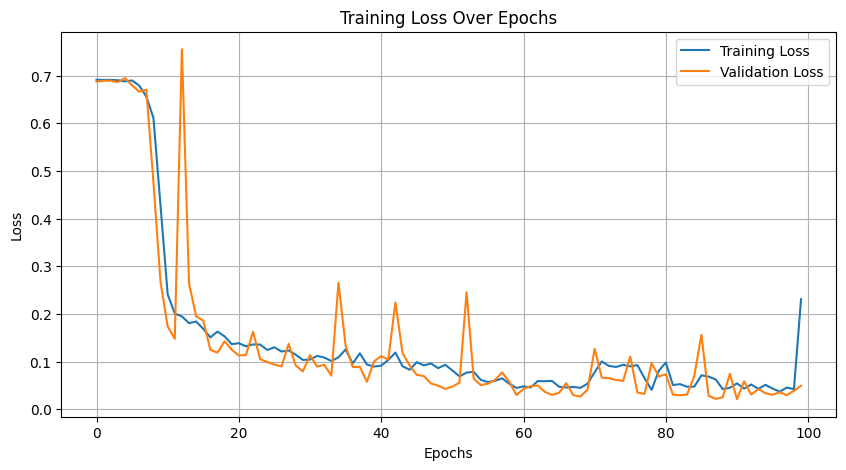

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [70]:
#CIA attack files
packet_count_attack = []
flow_attack = []
completely_colliding_flows_attack = []
non_colliding_flows_attack = []
cells_occuplied_epoch_end_attack = []
purecell_count_before_decode_attack = []
purecell_all_collision_attack = []
collisions_by_allflows_attack = []

for pct in [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7]:
    mal_flow_file_list = os.listdir(f'features/Type2/{str(pct).replace('.','_')}')
    for f in mal_flow_file_list:
        pc, ifs, ccf, ncf, coee, pcbd, pcac, cba = preprocess_file(f'features/Type2/{str(pct).replace('.','_')}/{f}')
        completely_colliding_flows_attack.append(ccf)
        non_colliding_flows_attack.append(ncf)
        cells_occuplied_epoch_end_attack.append(coee)
        purecell_count_before_decode_attack.append(pcbd)
        purecell_all_collision_attack.append(pcac)
        collisions_by_allflows_attack.append(cba)
        packet_count_attack.append(pc)
        flow_attack.append(ifs)


In [71]:
len(collisions_by_allflows_attack)

6014

In [72]:
normal_labels = [0 for i in range(5310)]
attack_labels = [1 for i in range(6014)]

In [73]:
labels = np.array(normal_labels + attack_labels)

In [74]:
completely_colliding_flows_normalized = normalize_dataset(completely_colliding_flows_normal+completely_colliding_flows_attack)
non_colliding_flows_normalized = normalize_dataset(non_colliding_flows_normal+non_colliding_flows_attack)
cells_occupied_epoch_end_normalized = normalize_dataset(cells_occuplied_epoch_end_normal+cells_occuplied_epoch_end_attack)
purecell_count_before_decode_normalized = normalize_dataset(purecell_count_before_decode_normal+purecell_count_before_decode_attack)
purecell_all_collision_normalized = normalize_dataset(purecell_all_collision_normal+purecell_all_collision_attack)
collisions_by_allflows_normalized = normalize_dataset(collisions_by_allflows_normal+collisions_by_allflows_attack)
flows_normalized = normalize_dataset(flow_normal+flow_attack)
packet_count_normalized = normalize_dataset(packet_count_normal+packet_count_attack)

In [75]:
dataset = list(zip(packet_count_normalized, flows_normalized, completely_colliding_flows_normalized, non_colliding_flows_normalized, cells_occupied_epoch_end_normalized, purecell_count_before_decode_normalized, purecell_all_collision_normalized, collisions_by_allflows_normalized, labels))
np.random.shuffle(dataset)
dataset[0:1]

[(array([0.0001387 , 0.00028015, 0.0004092 , 0.0005374 , 0.00066545,
         0.00079386, 0.00092232, 0.00104986, 0.00117554, 0.00130355,
         0.00143008, 0.00155642, 0.00168447, 0.00181205, 0.00193874,
         0.00206762, 0.00219441, 0.00232062, 0.00244859, 0.00256678,
         0.00256678, 0.00256678, 0.00256678, 0.00256678, 0.00256678,
         0.00256678, 0.00256678, 0.00256678]),
  array([0.00024505, 0.00039527, 0.00055162, 0.00069804, 0.00083441,
         0.00096243, 0.0011023 , 0.00121457, 0.00132948, 0.00144291,
         0.00155962, 0.00168246, 0.00179579, 0.00190151, 0.00200162,
         0.00209676, 0.00219254, 0.00228472, 0.00237205, 0.00245059,
         0.00245059, 0.00245059, 0.00245059, 0.00245059, 0.00245059,
         0.00245059, 0.00245059, 0.00245059]),
  array([1.02924912e-06, 6.17549470e-06, 2.29865636e-05, 6.55288604e-05,
         1.26254558e-04, 2.16485397e-04, 3.39995291e-04, 4.51154196e-04,
         5.85985830e-04, 7.40373197e-04, 9.29755035e-04, 1.14349577e-0

In [76]:
completely_colliding_flows_normalized = normalize_dataset(completely_colliding_flows_normal+completely_colliding_flows_attack)
non_colliding_flows_normalized = normalize_dataset(non_colliding_flows_normal+non_colliding_flows_attack)
cells_occupied_epoch_end_normalized = normalize_dataset(cells_occuplied_epoch_end_normal+cells_occuplied_epoch_end_attack)
purecell_count_before_decode_normalized = normalize_dataset(purecell_count_before_decode_normal+purecell_count_before_decode_attack)
purecell_all_collision_normalized = normalize_dataset(purecell_all_collision_normal+purecell_all_collision_attack)
collisions_by_allflows_normalized = normalize_dataset(collisions_by_allflows_normal+collisions_by_allflows_attack)
flows_normalized = normalize_dataset(flow_normal+flow_attack)
packet_count_normalized = normalize_dataset(packet_count_normal+packet_count_attack)

In [77]:

packet_count_normalized, flow_normalized, ccf_normalized, ncf_normalized, coe_normalized, pcbd_normalized, pac_normalized, cba_normalized, labels = tuple(map(list, zip(*dataset)))

In [78]:
ccf_normalized = np.array(ccf_normalized).reshape(-1, 28, 1)
ncf_normalized = np.array(ncf_normalized).reshape(-1, 28, 1)
coe_normalized = np.array(coe_normalized).reshape(-1, 28, 1)
pcbd_normalized = np.array(pcbd_normalized).reshape(-1, 28, 1)
pac_normalized = np.array(pac_normalized).reshape(-1, 28, 1)
cba_normalized = np.array(cba_normalized).reshape(-1, 28, 1)
flow_normalized = np.array(flow_normalized).reshape(-1,28,1)
packet_count_normalized = np.array(packet_count_normalized).reshape(-1, 28, 1)

In [79]:
labels = [lbl.item() for lbl in labels]

In [80]:
labels = np.array(labels)

In [88]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate


input_f1 = Input(shape=(28,1))
input_f2 = Input(shape=(28,1))
input_f3 = Input(shape=(28,1))
input_f4 = Input(shape=(28,1))
input_f5 = Input(shape=(28,1))
input_f6 = Input(shape=(28,1))
input_f7 = Input(shape=(28,1))
input_f8 = Input(shape=(28,1))

lstm_f1 = GRU(28)(input_f1)
lstm_f2 = GRU(28)(input_f2)
lstm_f3 = GRU(28)(input_f3)
lstm_f4 = GRU(28)(input_f4)
lstm_f5 = GRU(28)(input_f5)
lstm_f6 = GRU(28)(input_f6)
lstm_f7 = GRU(28)(input_f7)
lstm_f8 = GRU(28)(input_f8)


merged = Concatenate()([lstm_f1, lstm_f2, lstm_f3, lstm_f4, lstm_f5, lstm_f6, lstm_f7, lstm_f8])

output = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input_f1, input_f2, input_f3, input_f4, input_f5, input_f6, input_f7, input_f8], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_25      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_26      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_27      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_28      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_29      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_30      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_31      │ (None, 28, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_24 (GRU)        │ (None, 28)        │      2,604 │ input_layer_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_25 (GRU)        │ (None, 28)        │      2,604 │ input_layer_25[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_26 (GRU)        │ (None, 28)        │      2,604 │ input_layer_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_27 (GRU)        │ (None, 28)        │      2,604 │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_28 (GRU)        │ (None, 28)        │      2,604 │ input_layer_28[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_29 (GRU)        │ (None, 28)        │      2,604 │ input_layer_29[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_30 (GRU)        │ (None, 28)        │      2,604 │ input_layer_30[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_31 (GRU)        │ (None, 28)        │      2,604 │ input_layer_31[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 224)       │          0 │ gru_24[0][0],     │
│ (Concatenate)       │                   │            │ gru_25[0][0],     │
│                     │                   │            │ gru_26[0][0],     │
│                     │                   │            │ gru_27[0][0],     │
│                     │                   │            │ gru_28[0][0],     │
│                     │                   │            │ gru_29[0][0],     │
│                     │                   │            │ gru_30[0][0],     │
│                     │                   │            │ gru_31[0][0]      │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,057 (82.25 KB)

 Trainable params: 21,057 (82.25 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
from sklearn.model_selection import train_test_split
pc_tr, pc_tst, fc_tr, fc_tst, ccf_tr, ccf_tst, ncf_tr, ncf_tst, coe_tr, coe_tst, pcbd_tr, pcbd_tst, pac_tr, pac_tst, cba_tr, cba_tst, lbl_tr, lbl_tst = train_test_split(packet_count_normalized, flow_normalized, ccf_normalized, ncf_normalized, coe_normalized, pcbd_normalized, pac_normalized, cba_normalized, labels, test_size=0.1, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train = np.column_stack((pc_tr, fc_tr, ccf_tr, ncf_tr, coe_tr, pcbd_tr, pac_tr, cba_tr))
X_test = np.column_stack((pc_tst, fc_tst, ccf_tst, ncf_tst, coe_tst, pcbd_tst, pac_tst, cba_tst))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, lbl_tr)


# Make predictions and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(lbl_tst, y_pred))
print("Classification Report:\n", classification_report(lbl_tst, y_pred))

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [90]:
history = model.fit([pc_tr, fc_tr, ccf_tr, ncf_tr, coe_tr, pcbd_tr, pac_tr, cba_tr], lbl_tr, validation_data=([pc_tst, fc_tst, ccf_tst, ncf_tst, coe_tst, pcbd_tst, pac_tst, cba_tst], lbl_tst), epochs=100)

Epoch 1/100


/home/rajesh/.local/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_54', 'keras_tensor_55', 'keras_tensor_56', 'keras_tensor_57', 'keras_tensor_58', 'keras_tensor_59', 'keras_tensor_60', 'keras_tensor_61']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*')
  warnings.warn(


319/319 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5264 - loss: 0.6921 - val_accuracy: 0.5490 - val_loss: 0.6898
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5244 - loss: 0.6922 - val_accuracy: 0.5490 - val_loss: 0.6885
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5218 - loss: 0.6927 - val_accuracy: 0.5490 - val_loss: 0.6886
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5276 - loss: 0.6914 - val_accuracy: 0.5490 - val_loss: 0.6877
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5379 - loss: 0.6896 - val_accuracy: 0.5490 - val_loss: 0.6850
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5715 - loss: 0.6771 - val_accuracy: 0.6117 - val_loss: 0.5584
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7531 - loss: 0.5606 - val_accuracy: 0.7520 - val_loss: 0.3995
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8921 - loss: 0.3115 - val_

In [51]:

completely_colliding_flows_attack = []
non_colliding_flows_attack = []
cells_occuplied_epoch_end_attack = []
purecell_count_before_decode_attack = []
purecell_all_collision_attack = []
collisions_by_allflows_attack = []

ccf, ncf, coee, pcbd, pcac, cba = preprocess_file(f'window.csv')
completely_colliding_flows_attack.append(ccf)
non_colliding_flows_attack.append(ncf)
cells_occuplied_epoch_end_attack.append(coee)
purecell_count_before_decode_attack.append(pcbd)
purecell_all_collision_attack.append(pcac)
collisions_by_allflows_attack.append(cba)


completely_colliding_flows_normalized = normalize_dataset(completely_colliding_flows_attack)
non_colliding_flows_normalized = normalize_dataset(non_colliding_flows_attack)
cells_occupied_epoch_end_normalized = normalize_dataset(cells_occuplied_epoch_end_attack)
purecell_count_before_decode_normalized = normalize_dataset(purecell_count_before_decode_attack)
purecell_all_collision_normalized = normalize_dataset(purecell_all_collision_attack)
collisions_by_allflows_normalized = normalize_dataset(collisions_by_allflows_attack)


dataset = list(zip(completely_colliding_flows_normalized, non_colliding_flows_normalized, cells_occupied_epoch_end_normalized, purecell_count_before_decode_normalized, purecell_all_collision_normalized, collisions_by_allflows_normalized, labels))
np.random.shuffle(dataset)
dataset[0:1]

ccf_normalized, ncf_normalized, coe_normalized, pcbd_normalized, pac_normalized, cba_normalized, labels = tuple(map(list, zip(*dataset)))

ccf_normalized = np.array(ccf_normalized).reshape(-1, 28, 1)
ncf_normalized = np.array(ncf_normalized).reshape(-1, 28, 1)
coe_normalized = np.array(coe_normalized).reshape(-1, 28, 1)
pcbd_normalized = np.array(pcbd_normalized).reshape(-1, 28, 1)
pac_normalized = np.array(pac_normalized).reshape(-1, 28, 1)
cba_normalized = np.array(cba_normalized).reshape(-1, 28, 1)

In [52]:
lbl = model.predict([ccf_normalized, ncf_normalized, coe_normalized, pcbd_normalized, pac_normalized, cba_normalized])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [38]:
len(lbl[lbl>0.5])/len(lbl)

0.9916666666666667

In [39]:
print(list(lbl))

[array([0.9999888], dtype=float32), array([0.9999889], dtype=float32), array([0.99998885], dtype=float32), array([0.99998885], dtype=float32), array([0.9999889], dtype=float32), array([0.9999881], dtype=float32), array([0.9999889], dtype=float32), array([0.9999889], dtype=float32), array([0.999989], dtype=float32), array([0.99998885], dtype=float32), array([0.999989], dtype=float32), array([0.9999881], dtype=float32), array([0.99998873], dtype=float32), array([0.99998873], dtype=float32), array([0.99998885], dtype=float32), array([0.999988], dtype=float32), array([0.9999889], dtype=float32), array([0.99998814], dtype=float32), array([0.9999887], dtype=float32), array([0.99998903], dtype=float32), array([0.9999889], dtype=float32), array([0.9999889], dtype=float32), array([0.999989], dtype=float32), array([0.999989], dtype=float32), array([0.9999883], dtype=float32), array([0.999989], dtype=float32), array([0.99998885], dtype=float32), array([0.9999889], dtype=float32), array([0.9999888

In [47]:
for l in lbl:
    if l[0]<0.5:
        print(l)

[8.264934e-06]
[8.264934e-06]
[8.264934e-06]
[8.264934e-06]
[8.264934e-06]
[8.264934e-06]
[8.264934e-06]
